## Machine Learning Project Code File

# Fraud Detection — Exploratory Data Analysis (EDA)

**Dataset size:** 555,719 transaction records  
**Objective:** Understand transaction behavior, class imbalance, and fraud patterns to inform feature engineering and model selection.

This notebook focuses on:
- Understanding the structure and scale of the data
- Analyzing fraud vs non-fraud distributions
- Identifying meaningful signals for downstream modeling

Model training and evaluation are implemented separately in the `src/` directory.


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('fraud test.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [ ]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


**Extracting age based on the transaction date in each row (trans_date_trans_time) and dob (date of birth)**

In [ ]:
# Extracting age based on the transaction date in each row (trans_date_trans_time) and dob (date of birth)

# Data Preprocessing and cleaning
# Parse 'dob' using day/month/year
df['dob'] = pd.to_datetime(df['dob'], format='%d/%m/%Y', errors='coerce')

# Parse 'trans_date_trans_time' using full datetime format with hour and minute
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%d/%m/%Y %H:%M', errors='coerce')

# Calculate accurate age
df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year

# Optional: more precise age
# df['age'] = (df['trans_date_trans_time'] - df['dob']).dt.days // 365

# Check results
df[['dob', 'trans_date_trans_time', 'age']].head()


,dob,trans_date_trans_time,age
0,1968-03-19,2020-06-21 12:14:00,52
1,1990-01-17,2020-06-21 12:14:00,30
2,1970-10-21,2020-06-21 12:14:00,50
3,1987-07-25,2020-06-21 12:15:00,33
4,1955-07-06,2020-06-21 12:15:00,65


In [ ]:

# Drop unnecessary and PII columns
df1 = df.drop(columns=[
    'Unnamed: 0',        # Redundant index
    'cc_num',            # Unique identifier (PII)
    'first',             # PII
    'last',              # PII
    'street',            # PII
    'trans_num',         # Unique transaction ID
    'unix_time',         # Redundant with trans_date_trans_time
    'merch_lat',         # Merchant location
    'merch_long',         # Merchant location
     'trans_date_trans_time',  # already extracted features (Timestamp won’t help directly — we’ve already extracted age)
     'dob',                    # Already used to extract age — redundant now
    'lat', 'long',            # not used in modeling. Raw coordinates rarely help unless used for clustering
    'zip', 'city'
])

df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   merchant  555719 non-null  object 
 1   category  555719 non-null  object 
 2   amt       555719 non-null  float64
 3   gender    555719 non-null  object 
 4   state     555719 non-null  object 
 5   city_pop  555719 non-null  int64  
 6   job       555719 non-null  object 
 7   is_fraud  555719 non-null  int64  
 8   age       555719 non-null  int32  
dtypes: float64(1), int32(1), int64(2), object(5)
memory usage: 36.0+ MB


In [ ]:
df1['is_fraud'].value_counts()

,count
is_fraud,
0,553574
1,2145


⚠️ **Class Imbalance Notice**

Fraudulent transactions represent a very small fraction of total transactions, making this a highly imbalanced classification problem.  
This directly impacts model selection, evaluation metrics, and business risk tradeoffs.


In [ ]:
# Converting 'is_fraud'
df1['is_fraud'] = df1['is_fraud'].astype('category')
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   merchant  555719 non-null  object  
 1   category  555719 non-null  object  
 2   amt       555719 non-null  float64 
 3   gender    555719 non-null  object  
 4   state     555719 non-null  object  
 5   city_pop  555719 non-null  int64   
 6   job       555719 non-null  object  
 7   is_fraud  555719 non-null  category
 8   age       555719 non-null  int32   
dtypes: category(1), float64(1), int32(1), int64(1), object(5)
memory usage: 32.3+ MB


In [ ]:
df1['gender'].value_counts()

,count
gender,
F,304886
M,250833


In [ ]:
df1['category'].value_counts()

,count
category,
gas_transport,56370
grocery_pos,52553
home,52345
shopping_pos,49791
kids_pets,48692
shopping_net,41779
entertainment,40104
personal_care,39327
food_dining,39268


**Data Visualization**

**Fraud Rate by Category**

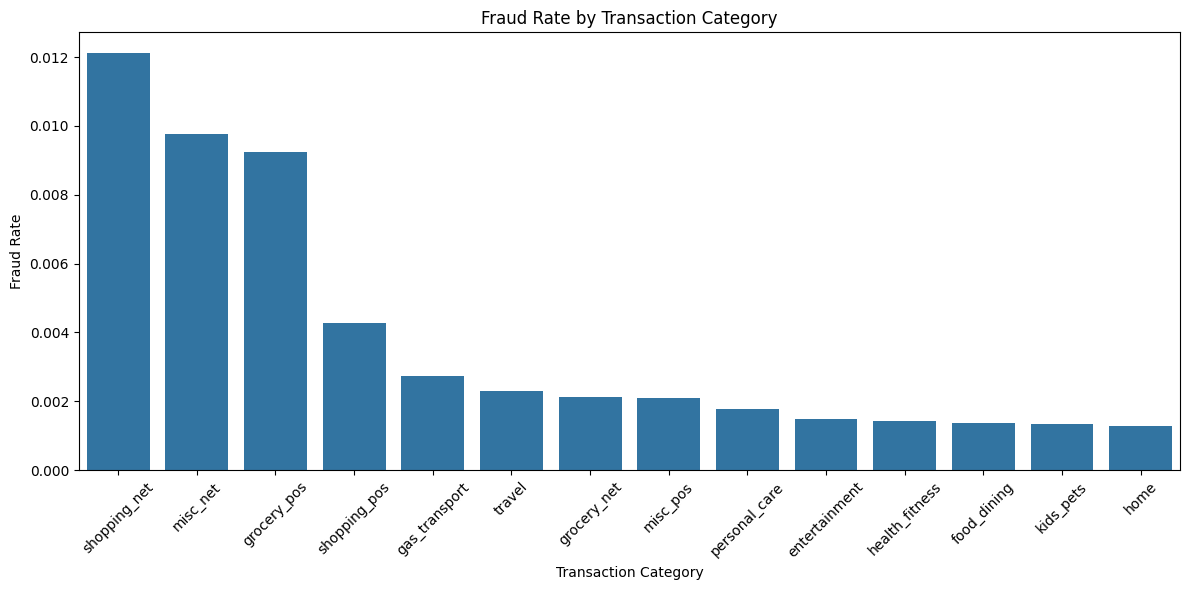

In [ ]:
# Fraud Rate by Category
import matplotlib.pyplot as plt
import seaborn as sns

# Check if 'is_fraud' is a categorical variable and convert it to int
if df1['is_fraud'].dtype == 'object' or df1['is_fraud'].dtype.name == 'category':
    df1['is_fraud'] = df1['is_fraud'].astype(int)

plt.figure(figsize=(12, 6))

# Calculate fraud rate by category
fraud_by_category = df1.groupby('category')['is_fraud'].mean().sort_values(ascending=False)

# Create the bar plot
sns.barplot(x=fraud_by_category.index, y=fraud_by_category.values)

plt.xticks(rotation=45)
plt.title('Fraud Rate by Transaction Category')
plt.ylabel('Fraud Rate')
plt.xlabel('Transaction Category')
plt.tight_layout()
plt.show()

**Fraud Rate by Gender**

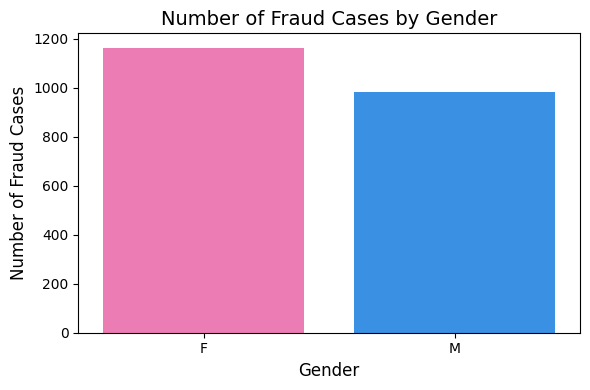

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only fraud transactions
fraud_only = df1[df1['is_fraud'] == 1]

# Count of fraud cases by gender
fraud_counts = fraud_only['gender'].value_counts().reset_index()
fraud_counts.columns = ['gender', 'count']

# Plot with hue assigned to 'gender'
plt.figure(figsize=(6, 4))
sns.barplot(data=fraud_counts, x='gender', y='count', hue='gender', palette=["hotpink", "dodgerblue"], legend=False)

# Improve plot aesthetics
plt.title('Number of Fraud Cases by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Fraud Cases', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Display the plot
plt.show()

**Fraud Cases by State**

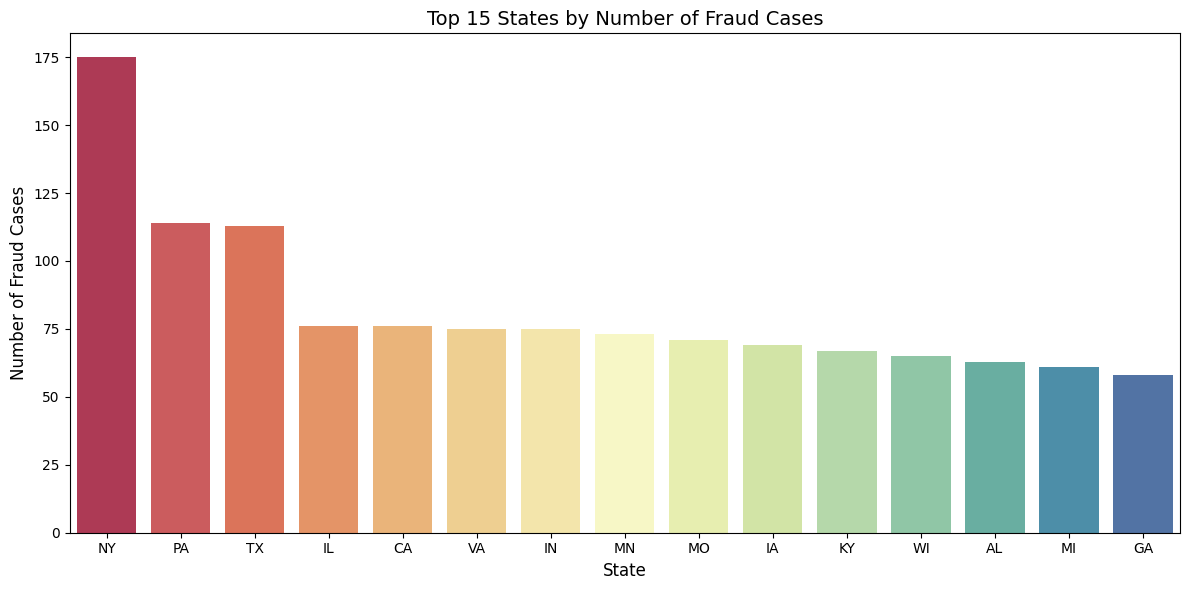

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only fraud transactions
fraud_only = df1[df1['is_fraud'] == 1]

# Count of fraud cases by state
fraud_counts_state = fraud_only['state'].value_counts().reset_index()
fraud_counts_state.columns = ['state', 'count']

# Plot top 15 states with most fraud cases
plt.figure(figsize=(12, 6))
sns.barplot(data=fraud_counts_state.head(15), x='state', y='count', hue='state', palette='Spectral', legend=False)

# Improve plot aesthetics
plt.title('Top 15 States by Number of Fraud Cases', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Fraud Cases', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Display the plot
plt.show()


**Word Cloud of Cities with Fraud Cases**

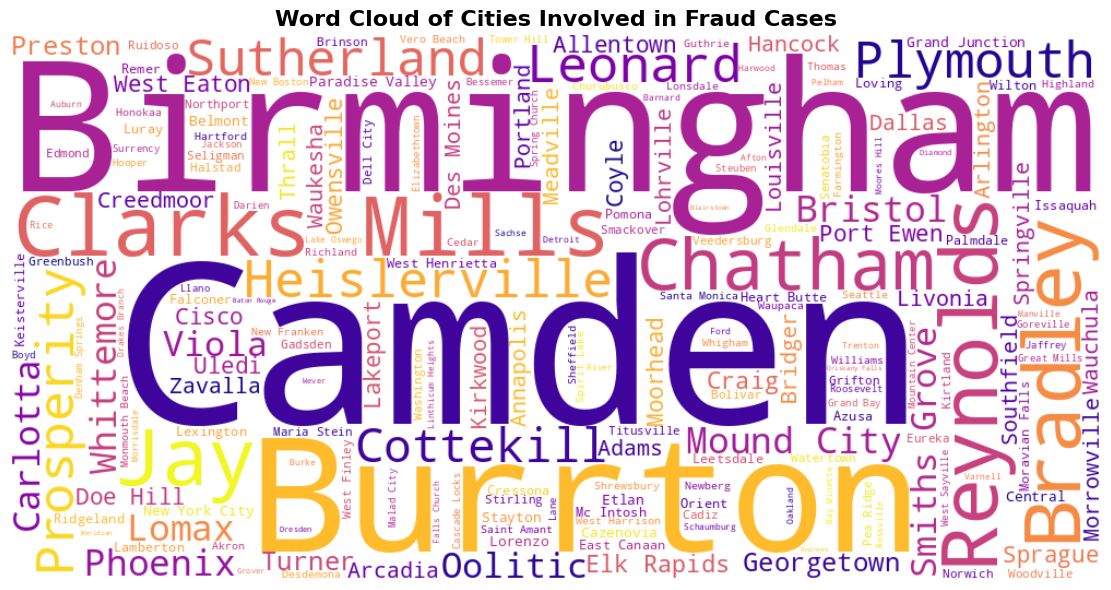

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

# Filter fraud transactions only
fraud_only = df[df['is_fraud'] == 1]

# Create a list of cities involved in fraud
fraud_cities = fraud_only['city'].tolist()

# Count frequency of each city
city_freq = Counter(fraud_cities)

# Generate word cloud
fraud_city_wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    colormap='plasma'
).generate_from_frequencies(city_freq)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(fraud_city_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cities Involved in Fraud Cases', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


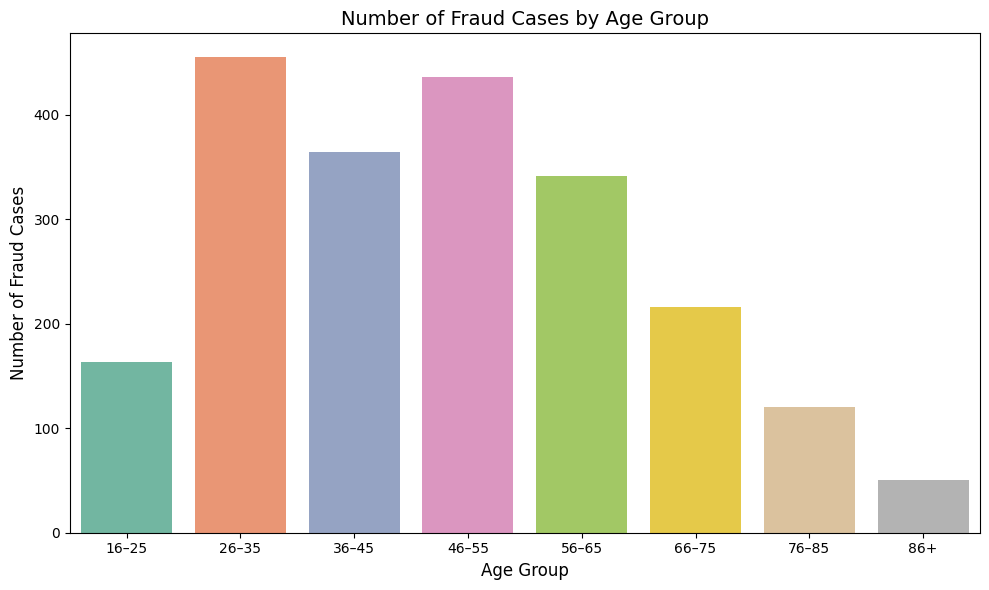

In [ ]:
# Define age bins and labels
bins = [15, 25, 35, 45, 55, 65, 75, 85, 100]
labels = ['16–25', '26–35', '36–45', '46–55', '56–65', '66–75', '76–85', '86+']

# Create age group column
df1['age_group'] = pd.cut(df1['age'], bins=bins, labels=labels, right=True)


import matplotlib.pyplot as plt
import seaborn as sns

# Filter only fraud transactions
fraud_only = df1[df1['is_fraud'] == 1]

# Count fraud cases in each age group
fraud_by_age_group = fraud_only['age_group'].value_counts().sort_index().reset_index()
fraud_by_age_group.columns = ['age_group', 'count']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=fraud_by_age_group, x='age_group', y='count', hue='age_group', palette='Set2', legend=False)

# Improve aesthetics
plt.title('Number of Fraud Cases by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Fraud Cases', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


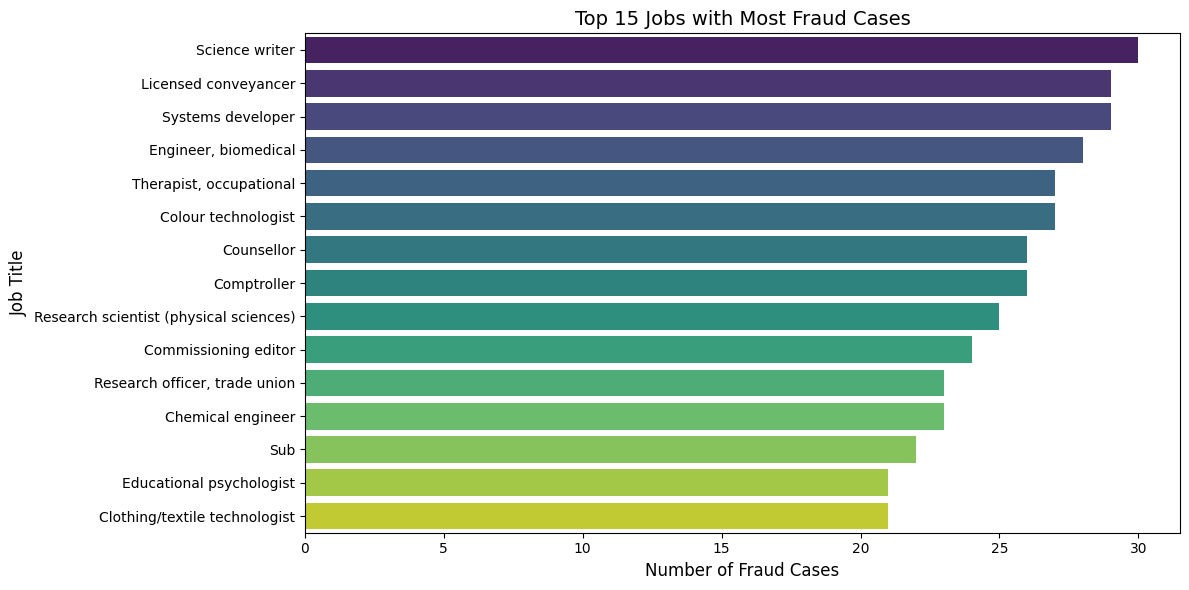

In [ ]:
# Top 15 Jobs with the Most Fraud Cases

import matplotlib.pyplot as plt
import seaborn as sns

# Filter fraud cases
fraud_only = df1[df1['is_fraud'] == 1]

# Count fraud cases by job
fraud_by_job = fraud_only['job'].value_counts().head(15).reset_index()
fraud_by_job.columns = ['job', 'count']
fraud_by_job['hue'] = fraud_by_job['job']  # Dummy hue for color mapping

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=fraud_by_job,
    x='count',
    y='job',
    hue='hue',
    palette='viridis',
    legend=False
)

# Improve styling
plt.title('Top 15 Jobs with Most Fraud Cases', fontsize=14)
plt.xlabel('Number of Fraud Cases', fontsize=12)
plt.ylabel('Job Title', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


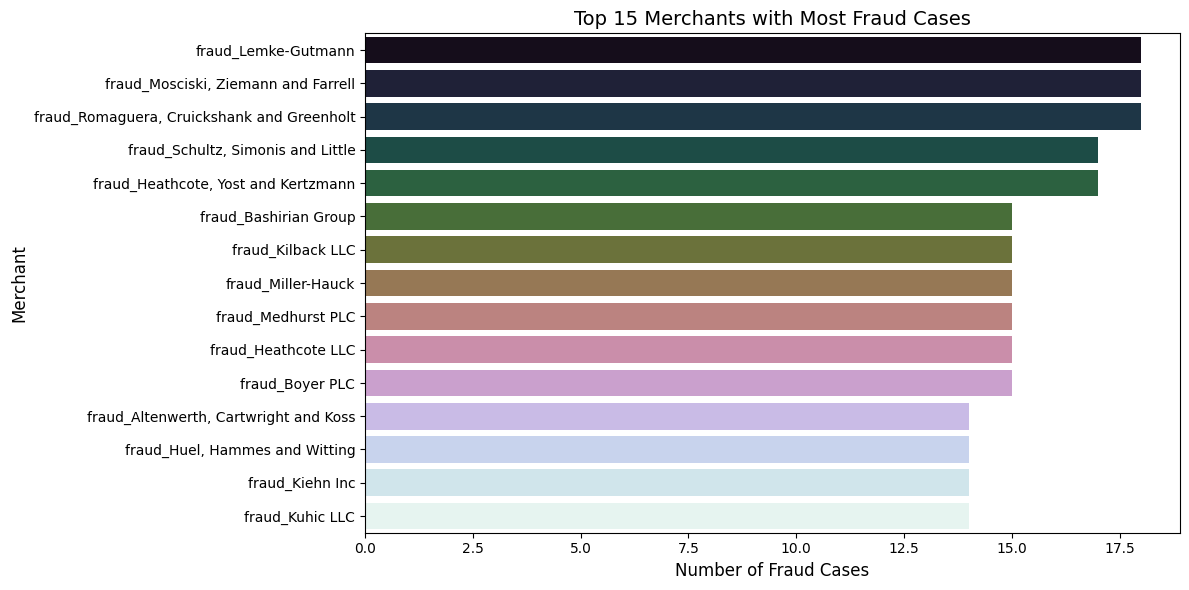

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 15 merchants with fraud
fraud_by_merchant = fraud_only['merchant'].value_counts().head(15).reset_index()
fraud_by_merchant.columns = ['merchant', 'count']
fraud_by_merchant['hue'] = fraud_by_merchant['merchant']  # Dummy hue just for color mapping

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=fraud_by_merchant,
    x='count',
    y='merchant',
    hue='hue',
    palette='cubehelix',
    legend=False
)

# Styling
plt.title('Top 15 Merchants with Most Fraud Cases', fontsize=14)
plt.xlabel('Number of Fraud Cases', fontsize=12)
plt.ylabel('Merchant', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
#Final data cleaning and processing for further analysis and predictive modeling
# First check of df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   merchant   555719 non-null  object  
 1   category   555719 non-null  object  
 2   amt        555719 non-null  float64 
 3   gender     555719 non-null  object  
 4   state      555719 non-null  object  
 5   city_pop   555719 non-null  int64   
 6   job        555719 non-null  object  
 7   is_fraud   555719 non-null  int64   
 8   age        555719 non-null  int32   
 9   age_group  554756 non-null  category
dtypes: category(1), float64(1), int32(1), int64(2), object(5)
memory usage: 36.6+ MB


In [ ]:
# Converting data to appropriate data types

df1['age'] = df1['age'].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   merchant   555719 non-null  object  
 1   category   555719 non-null  object  
 2   amt        555719 non-null  float64 
 3   gender     555719 non-null  object  
 4   state      555719 non-null  object  
 5   city_pop   555719 non-null  int64   
 6   job        555719 non-null  object  
 7   is_fraud   555719 non-null  int64   
 8   age        555719 non-null  int64   
 9   age_group  554756 non-null  category
dtypes: category(1), float64(1), int64(3), object(5)
memory usage: 38.7+ MB


In [ ]:
df1.head()

,merchant,category,amt,gender,state,city_pop,job,is_fraud,age,age_group
0,fraud_Kirlin and Sons,personal_care,2.86,M,SC,333497,Mechanical engineer,0,52,46–55
1,fraud_Sporer-Keebler,personal_care,29.84,F,UT,302,"Sales professional, IT",0,30,26–35
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,NY,34496,"Librarian, public",0,50,46–55
3,fraud_Haley Group,misc_pos,60.05,M,FL,54767,Set designer,0,33,26–35
4,fraud_Johnston-Casper,travel,3.19,M,MI,1126,Furniture designer,0,65,56–65


In [ ]:
# Renaming df1 for predictive modeling

df_model= df1
df_model.head(10)

,merchant,category,amt,gender,state,city_pop,job,is_fraud,age,age_group
0,fraud_Kirlin and Sons,personal_care,2.86,M,SC,333497,Mechanical engineer,0,52,46–55
1,fraud_Sporer-Keebler,personal_care,29.84,F,UT,302,"Sales professional, IT",0,30,26–35
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,NY,34496,"Librarian, public",0,50,46–55
3,fraud_Haley Group,misc_pos,60.05,M,FL,54767,Set designer,0,33,26–35
4,fraud_Johnston-Casper,travel,3.19,M,MI,1126,Furniture designer,0,65,56–65
5,fraud_Daugherty LLC,kids_pets,19.55,F,NY,520,Psychotherapist,0,29,26–35
6,fraud_Romaguera Ltd,health_fitness,133.93,F,CA,1139,"Therapist, occupational",0,69,66–75
7,fraud_Reichel LLC,personal_care,10.37,F,SD,343,"Development worker, international aid",0,48,46–55
8,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,M,PA,3688,Advice worker,0,47,46–55
9,fraud_Kilback Group,food_dining,66.54,F,TX,263,Barrister,0,64,56–65


In [ ]:
df_model.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   merchant   555719 non-null  object  
 1   category   555719 non-null  object  
 2   amt        555719 non-null  float64 
 3   gender     555719 non-null  object  
 4   state      555719 non-null  object  
 5   city_pop   555719 non-null  int64   
 6   job        555719 non-null  object  
 7   is_fraud   555719 non-null  int64   
 8   age        555719 non-null  int64   
 9   age_group  554756 non-null  category
dtypes: category(1), float64(1), int64(3), object(5)
memory usage: 38.7+ MB


In [ ]:
# Drop selected columns
df_reduced = df_model.drop(columns=['merchant', 'job', 'age_group']) # 'gender'

# Check result
df_reduced.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   category  555719 non-null  object 
 1   amt       555719 non-null  float64
 2   gender    555719 non-null  object 
 3   state     555719 non-null  object 
 4   city_pop  555719 non-null  int64  
 5   is_fraud  555719 non-null  int64  
 6   age       555719 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 29.7+ MB


In [ ]:
# Make sure the datetime column is in correct format in original df
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%d/%m/%Y %H:%M', errors='coerce')

# Extract time-based features from df
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_dayofweek'] = df['trans_date_trans_time'].dt.dayofweek
df['is_weekend'] = df['trans_dayofweek'].isin([5, 6]).astype(int)

# Optional hour band
def hour_band(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['hour_band'] = df['trans_hour'].apply(hour_band)

# Merge time features into df_reduced
df_reduced = df_reduced.copy()
df_reduced['trans_hour'] = df['trans_hour']
df_reduced['trans_dayofweek'] = df['trans_dayofweek']
df_reduced['is_weekend'] = df['is_weekend']
df_reduced['hour_band'] = df['hour_band']
df_reduced.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   category         555719 non-null  object 
 1   amt              555719 non-null  float64
 2   gender           555719 non-null  object 
 3   state            555719 non-null  object 
 4   city_pop         555719 non-null  int64  
 5   is_fraud         555719 non-null  int64  
 6   age              555719 non-null  int64  
 7   trans_hour       555719 non-null  int32  
 8   trans_dayofweek  555719 non-null  int32  
 9   is_weekend       555719 non-null  int64  
 10  hour_band        555719 non-null  object 
dtypes: float64(1), int32(2), int64(4), object(4)
memory usage: 42.4+ MB


In [ ]:
df_reduced.head(100)

,category,amt,gender,state,city_pop,is_fraud,age,trans_hour,trans_dayofweek,is_weekend,hour_band
0,personal_care,2.86,M,SC,333497,0,52,12,6,1,Afternoon
1,personal_care,29.84,F,UT,302,0,30,12,6,1,Afternoon
2,health_fitness,41.28,F,NY,34496,0,50,12,6,1,Afternoon
3,misc_pos,60.05,M,FL,54767,0,33,12,6,1,Afternoon
4,travel,3.19,M,MI,1126,0,65,12,6,1,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...
95,shopping_pos,37.14,F,AR,5161,0,27,12,6,1,Afternoon
96,food_dining,16.06,M,OH,47772,0,54,12,6,1,Afternoon
97,shopping_pos,1.01,F,VA,1970,0,35,12,6,1,Afternoon
98,entertainment,6.98,M,MI,31515,0,49,12,6,1,Afternoon


In [ ]:
df_reduced['trans_dayofweek'].value_counts()

,count
trans_dayofweek,
0,115136
1,110113
6,93098
4,62806
5,62270
3,59456
2,52840


In [ ]:
df_reduced['trans_hour'].value_counts()

,count
trans_hour,
23,28798
16,28563
22,28388
21,28205
14,28204
13,28178
17,28064
15,28048
12,28037


In [ ]:
# 0 = not weekend, 1 = is weekend
df_reduced['is_weekend'].value_counts()

,count
is_weekend,
0,400351
1,155368


In [ ]:
df_reduced['hour_band'].value_counts()

,count
hour_band,
Night,176419
Afternoon,141030
Morning,126297
Evening,111973


**Visualize the number of fraud cases by hour_band, so you can see if fraud is more common during Morning, Afternoon, Evening, or Night**

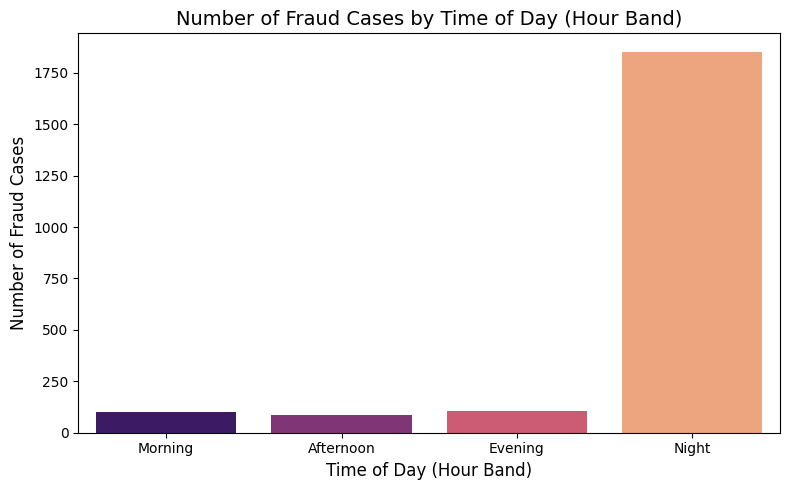

In [ ]:
# Visualize the number of fraud cases by hour_band, so you can see if fraud is more common during Morning, Afternoon, Evening, or Night

import matplotlib.pyplot as plt
import seaborn as sns

# Filter only fraud cases
fraud_only = df_reduced[df_reduced['is_fraud'] == 1]

# Count frauds per hour_band and convert to DataFrame
fraud_by_hour_band = fraud_only['hour_band'].value_counts().reindex(['Morning', 'Afternoon', 'Evening', 'Night']).reset_index()
fraud_by_hour_band.columns = ['hour_band', 'count']

# Plot with hue based on hour_band
plt.figure(figsize=(8, 5))
sns.barplot(data=fraud_by_hour_band, x='hour_band', y='count', hue='hour_band', palette='magma', legend=False)

# Customize plot
plt.title('Number of Fraud Cases by Time of Day (Hour Band)', fontsize=14)
plt.xlabel('Time of Day (Hour Band)', fontsize=12)
plt.ylabel('Number of Fraud Cases', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


## Next Steps

Based on insights from this exploratory analysis, the next phase includes:
- Feature engineering to capture transaction behavior
- Addressing class imbalance using resampling techniques
- Training and evaluating multiple classification models
- Selecting models based on business-relevant metrics (recall, precision, F1-score)

These steps are implemented in modular scripts within the `src/` directory.
